In [65]:
from yroots.utils import condeigs
from yroots.polyroots import solve
from yroots.Multiplication import *
import yroots as yr
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
from tests.devastating_example_test_scripts import *
from tests.conditioning_ratios import *
from scipy.stats import linregress
from scipy.spatial.distance import pdist
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### most of the functions in this notebook are in tests/conditioning_ratios.py. There is some documentation, but certainly not the most thorough, so feel free to ask my any questions. - Sue

#### From Hayden's JMM Presentation:

Recall that the condition number of a simple root $z$ of $f:\mathbb{R}^n\mapsto\mathbb{R}^n$ is:
    $$\kappa(z,f) = \left\lVert{Df(z)^{-1}}\right\rVert_2$$
and that the condition number of a simple eigenvalue $\lambda$ of A such that $Ax = \lambda x$ and $A^*y = \lambda y$ is:
    $$\kappa(\lambda,A) = \frac{\left\lVert{x}\right\rVert \left\lVert{y}\right\rVert}{|y^*x|}$$
    
Define the **conditioning ratio** for a M\"oller-Stetter eigenproblem for an eigenvalue $\lambda$ corresponding to a root $z$ to be:
    $$GF(\lambda,z,f,m_h) = \log_{10}\frac{\kappa(\lambda,m_h)}{\kappa(z,f)}$$
    
This measures how many additional digits of precision may be lost when converting the root-finding problem into an eigenproblem.

<img src="growthfactor.png" width=600 height=600 />


# loading in data saved from the server

### random systems

In [66]:
folder = 'tests/conditioning_ratios/rand/newton/'
normal_masks = {d:~np.load(folder+f'dim{d}/not_full_roots_deg2.npy')\
                for d in range(3,7)}
normal_masks[7] = np.ones(200,dtype=bool)
normal_masks[2] = np.ones(300,dtype=bool)
rand_polished = {d:np.stack(np.load(folder+f'dim{d}/deg2_res.npy',
                                allow_pickle=True)[normal_masks[d]])
                      for d in range(2,8)}
rand_polished[8] = np.stack([np.load(folder+f'dim8/deg2_sys{i}.npy')
                                 for i in range(23)])
for d in rand_polished.keys():
    print(rand_polished[d].shape)

(300, 2, 4)
(295, 3, 8)
(298, 4, 16)
(298, 5, 32)
(198, 6, 64)
(200, 7, 128)
(23, 8, 256)


### devastating systems

In [67]:
folder = 'tests/conditioning_ratios/dev/newton/'
dev_polished = {d:np.stack(np.load(folder+f'dim{d}/deg2.npy',
                                allow_pickle=True))
                      for d in range(2,7)}
dev_polished[7] = [np.load(folder+f'dim7/deg2_sys{i}.npy',
                                    allow_pickle=True)
                                 for i in range(45)]
dev_polished[8] = [np.load(folder+f'dim8/deg2_sys{i}.npy',
                                    allow_pickle=True)
                                 for i in range(25)]
#I accidentally saved the converging root info-- so let's check that out now and then remove it
for d in dev_polished.keys():
    for i,sys in enumerate(dev_polished[d]):
        if d > 6:
            sys = sys[0]
        gf,newt_dist,root_dist = sys
        if not 10*newt_dist < root_dist:
            print(d,i)
            print('**Potentially converging roots with polishing**')
            print(f'\tNewton changed roots by at most: {newt_dist}')
            print(f'\tDist between root was at least:  {root_dist}')
    dev_polished[d] = np.array([sys[0] for sys in dev_polished[d]])
for d in [7,8]:
    dev_polished[d] = np.array([sys[0] for sys in dev_polished[d]])
for d in dev_polished.keys():
    print(dev_polished[d].shape)  

(50, 2)
(50, 3)
(50, 4)
(50, 5)
(50, 6)
(45, 7)
(25, 8)


### comparison to without polishing

folder = 'tests/conditioning_ratios/rand/nopol/'
normal_masks_nopol = {d:~np.load(folder+f'dim{d}/not_full_roots_deg2.npy') for d in range(3,5)}
normal_masks_nopol[2] = np.ones(300,dtype=bool)
rand_nopol = {d:np.stack(np.load(folder+f'dim{d}/deg2_res.npy',
                                allow_pickle=True)[normal_masks_nopol[d]])
                      for d in range(2,5)}
for d in rand_nopol.keys():
    print(rand_nopol[d].shape)

folder = 'tests/conditioning_ratios/dev/nopol/'
dev_nopol = {d:np.stack(np.load(folder+f'dim{d}/deg2.npy',
                                allow_pickle=True))
                      for d in range(2,5)}
for d in dev_nopol.keys():
    print(dev_nopol[d].shape)  

summary: it was practically the same, but polishing the denominator (root) did seem to make it ever so slightly more accurate, so let's go with that.

# devastating example
run the same code on devastating examples with eps = .1 to show empirical line, and with a perturbed coefficient tensor too to show it gets nicer if you do that

In [68]:
gf_dev_1 = devestating_conditioning_ratios([2,3,4],.1,'power',newton=False,save=False)

In [69]:
gf_dev_2 = devestating_conditioning_ratios([2,3,4],.01,'power',newton=False,save=False)

In [104]:
gf_dev_1_delta_3 = devestating_conditioning_ratios([2,3,4],.1,'power',perturb_eps=.001,newton=False,save=False)

In [71]:
gf_dev_2_delta_1 = devestating_conditioning_ratios([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.1)

In [72]:
gf_dev_2_delta_2 = devestating_conditioning_ratios([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.01)


In [105]:
gf_dev_2_delta_3 = devestating_conditioning_ratios([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.001)

In [106]:
gf_dev_2_delta_4 = devestating_conditioning_ratios([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.0001)

In [75]:
gf_dev_2_delta_5 = devestating_conditioning_ratios([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.00001)

devastating Systems, $\epsilon=.1$
Slope: 1.0002665553073948 
Intercept: -0.9987342722898962

Perturbed devastating Systems, $\epsilon=.1, \delta=.001$
Slope: 0.9790055570949109 
Intercept: -1.0009645661961284

Random Systems
Slope: 0.049974162632344575 
Intercept: 0.20151817188668214



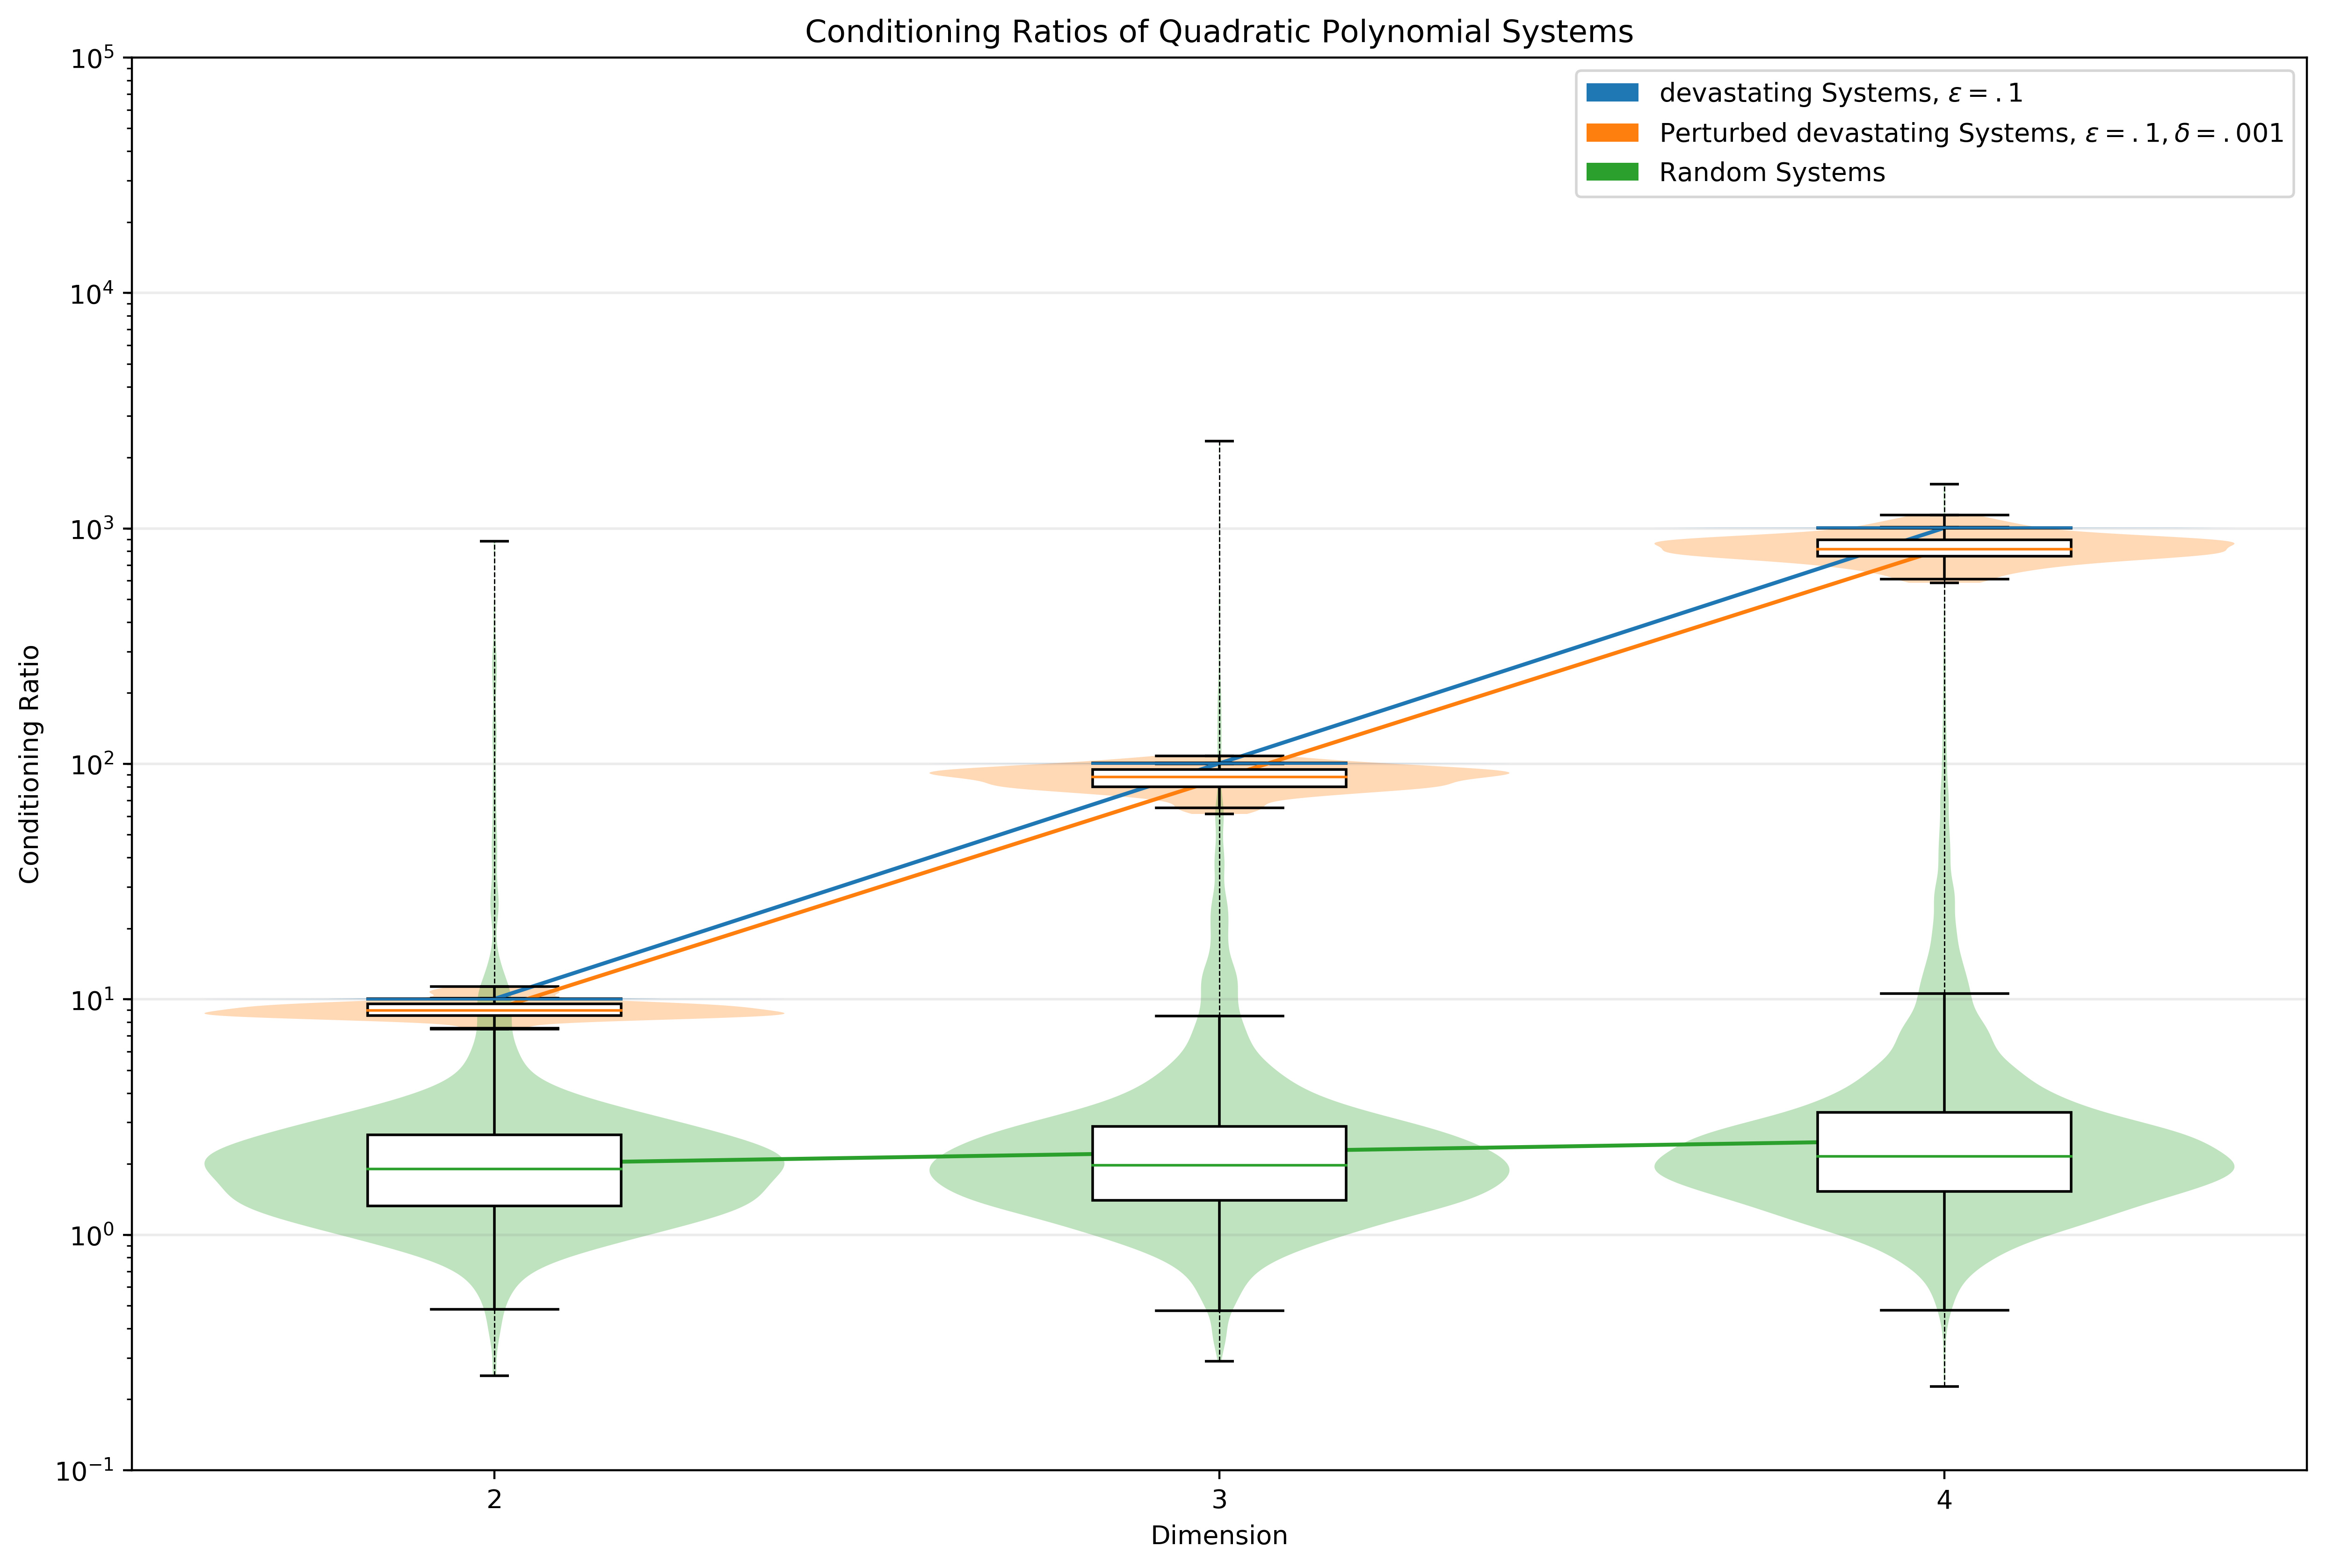

In [76]:
plot([gf_dev_1,
      gf_dev_1_delta3,
      {d:rand_polished[d] for d in range(2,5)}],
     [r'devastating Systems, $\epsilon=.1$',
      r'Perturbed devastating Systems, $\epsilon=.1, \delta=.001$',
      r'Random Systems'],
     figsize=(15,10), filename='CRoQPS1')

devastating Systems, $\epsilon=.01$
Slope: 2.000002947524729 
Intercept: -1.9999878417351438

Perturbed devastating Systems, $\epsilon=.01, \delta=.1$
Slope: 0.37446224959916774 
Intercept: -0.4776076970334088

Perturbed devastating Systems, $\epsilon=.01, \delta=.01$
Slope: 0.9165401503834628 
Intercept: -1.1305347694926966

Perturbed devastating Systems, $\epsilon=.01, \delta=.001$
Slope: 1.3144169181131522 
Intercept: -1.4232514579487403

Perturbed devastating Systems, $\epsilon=.01, \delta=.0001$
Slope: 1.7435121528264728 
Intercept: -1.8216278541335482

Perturbed devastating Systems, $\epsilon=.01, \delta=.00001$
Slope: 1.9789791910526515 
Intercept: -2.002600580217096

Random Systems
Slope: 0.049974162632344575 
Intercept: 0.20151817188668214



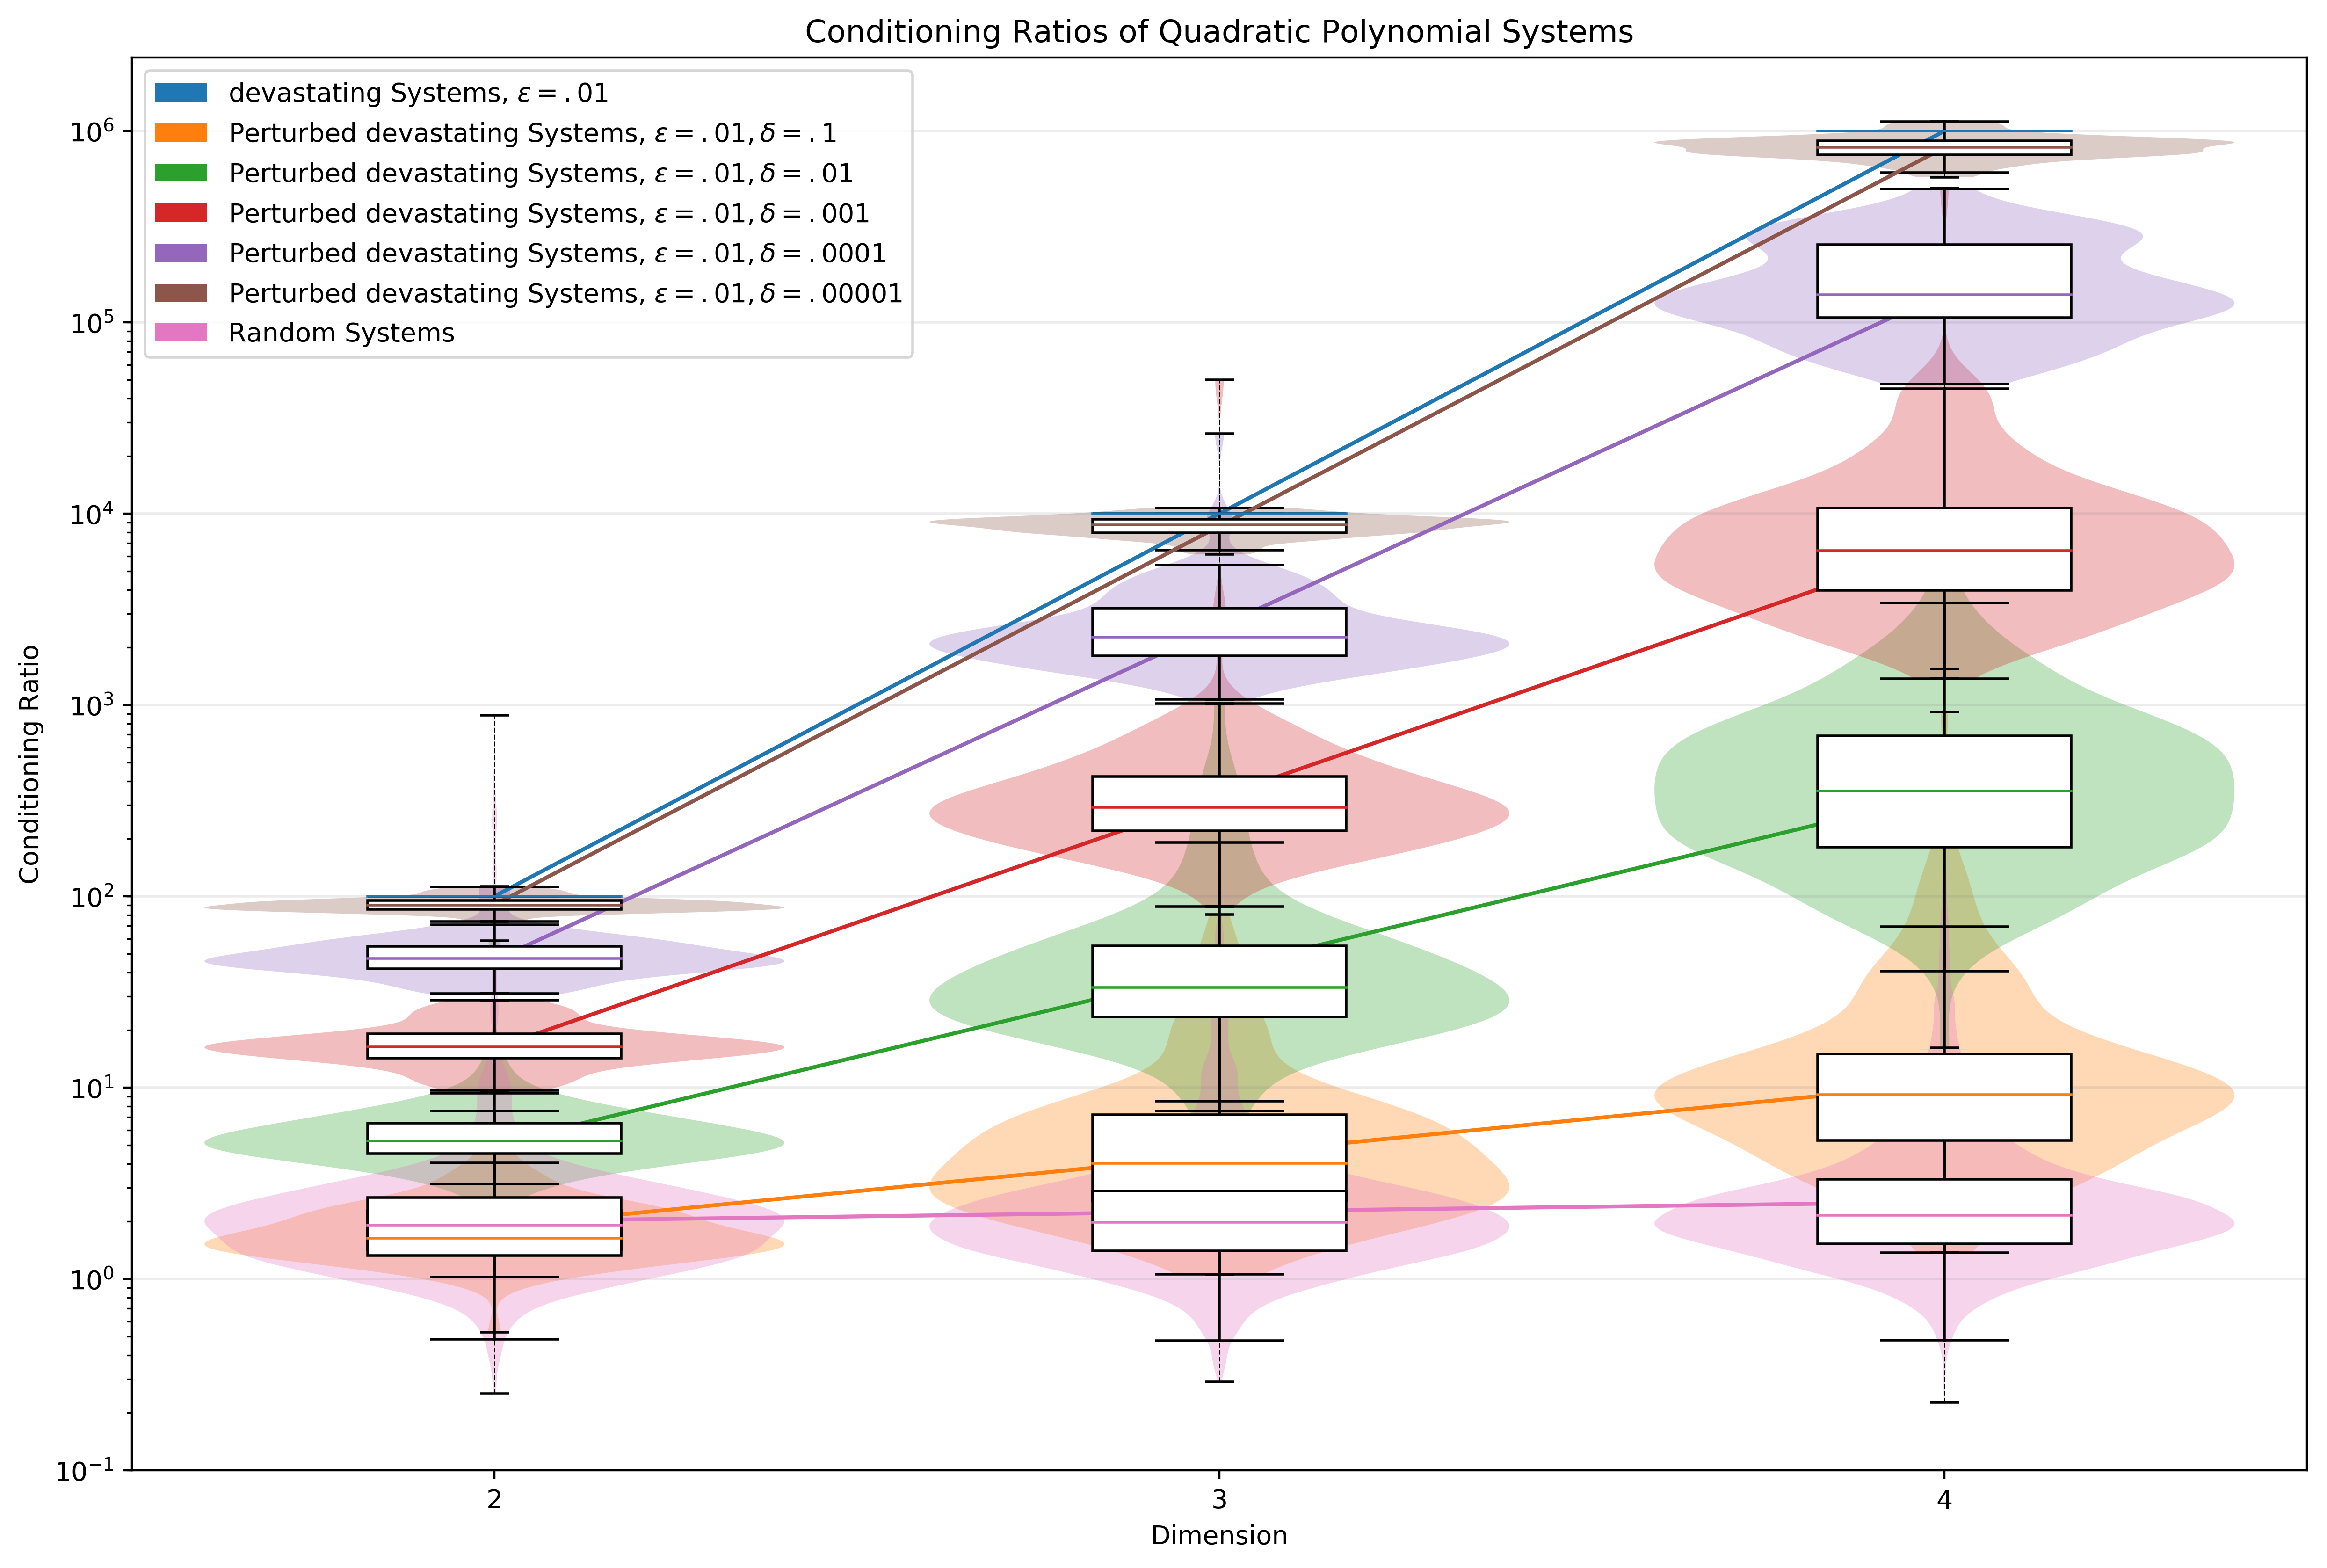

In [77]:
plot([gf_dev_2,
      gf_dev_2_delta_1,
      gf_dev_2_delta_2,
      gf_dev_2_delta3,
      gf_dev_2_delta4,
      gf_dev_2_delta_5,
      {d:rand_polished[d] for d in range(2,5)}],
     [r'devastating Systems, $\epsilon=.01$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.1$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.01$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.001$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.0001$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.00001$',
      r'Random Systems'],
     figsize=(15,10), filename='CRoQPS2')

# How do the slopes of these lines decrease as you perturb more and more?

In [78]:
slopes = [1.99999853923155,
          2.0002693537571408,
          1.7642487415358612,
          1.333339472793583,
          0.920409745658012,
          0.4130133594593585]
deltas = [0,1e-5,1e-4,1e-3,1e-2,1e-1]

In [79]:
deltas,slopes = list(deltas),list(slopes)
for delta in np.linspace(1e-5,1e-1):
    data = devestating_conditioning_ratios([2,3,4],.01,
                                      'power',
                                      newton=False,
                                      save=False,
                                      perturb_eps=delta)
    data_log10 = [np.log10(data[d].flatten()) for d in data.keys()]
    points = np.array([[d,val] for i,d in enumerate(data.keys()) for val in data_log10[i]])
    slope = linregress(points)[0]
    deltas.append(delta)
    slopes.append(slope)

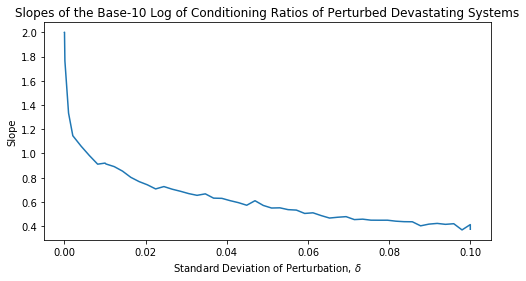

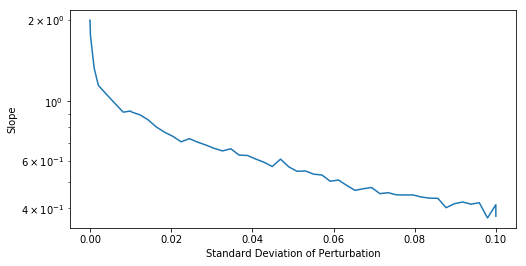

In [80]:
srt = np.argsort(deltas)
deltas = np.array(deltas)
slopes = np.array(slopes)
plt.figure(figsize=(8,4))
plt.plot(deltas[srt],slopes[srt])
plt.xlabel(r'Standard Deviation of Perturbation, $\delta$')
plt.ylabel('Slope')
plt.title('Slopes of the Base-10 Log of Conditioning Ratios of Perturbed Devastating Systems')
plt.savefig(fname='slopes2.pdf',bbox_inches='tight',dpi=400,format='pdf')
plt.show()
plt.figure(figsize=(8,4))
plt.semilogy(deltas[srt],slopes[srt])
plt.xlabel('Standard Deviation of Perturbation')
plt.ylabel('Slope')
plt.show()

summary: 

perturbing opens up new choices of basis

cond num probably isn't cont at zero

# plotting

plot([gf_dev_1,shifted_gf_dev_1,gf_dev_2,shifted_gf_dev_2],
     [r'devastating Systems, $\epsilon=.1$',r'Shifted devastating Systems, $\epsilon=.1$',
      r'devastating Systems, $\epsilon=.01$',r'Shifted devastating Systems, $\epsilon=.01$'],
     figsize=(15,10))

Random Systems
Slope: 0.042297149196839905 
Intercept: 0.24599742391990143

Devastating Systems, $\epsilon=10^{-1}$
Slope: 1.0000433894444425 
Intercept: -0.9981340387625659



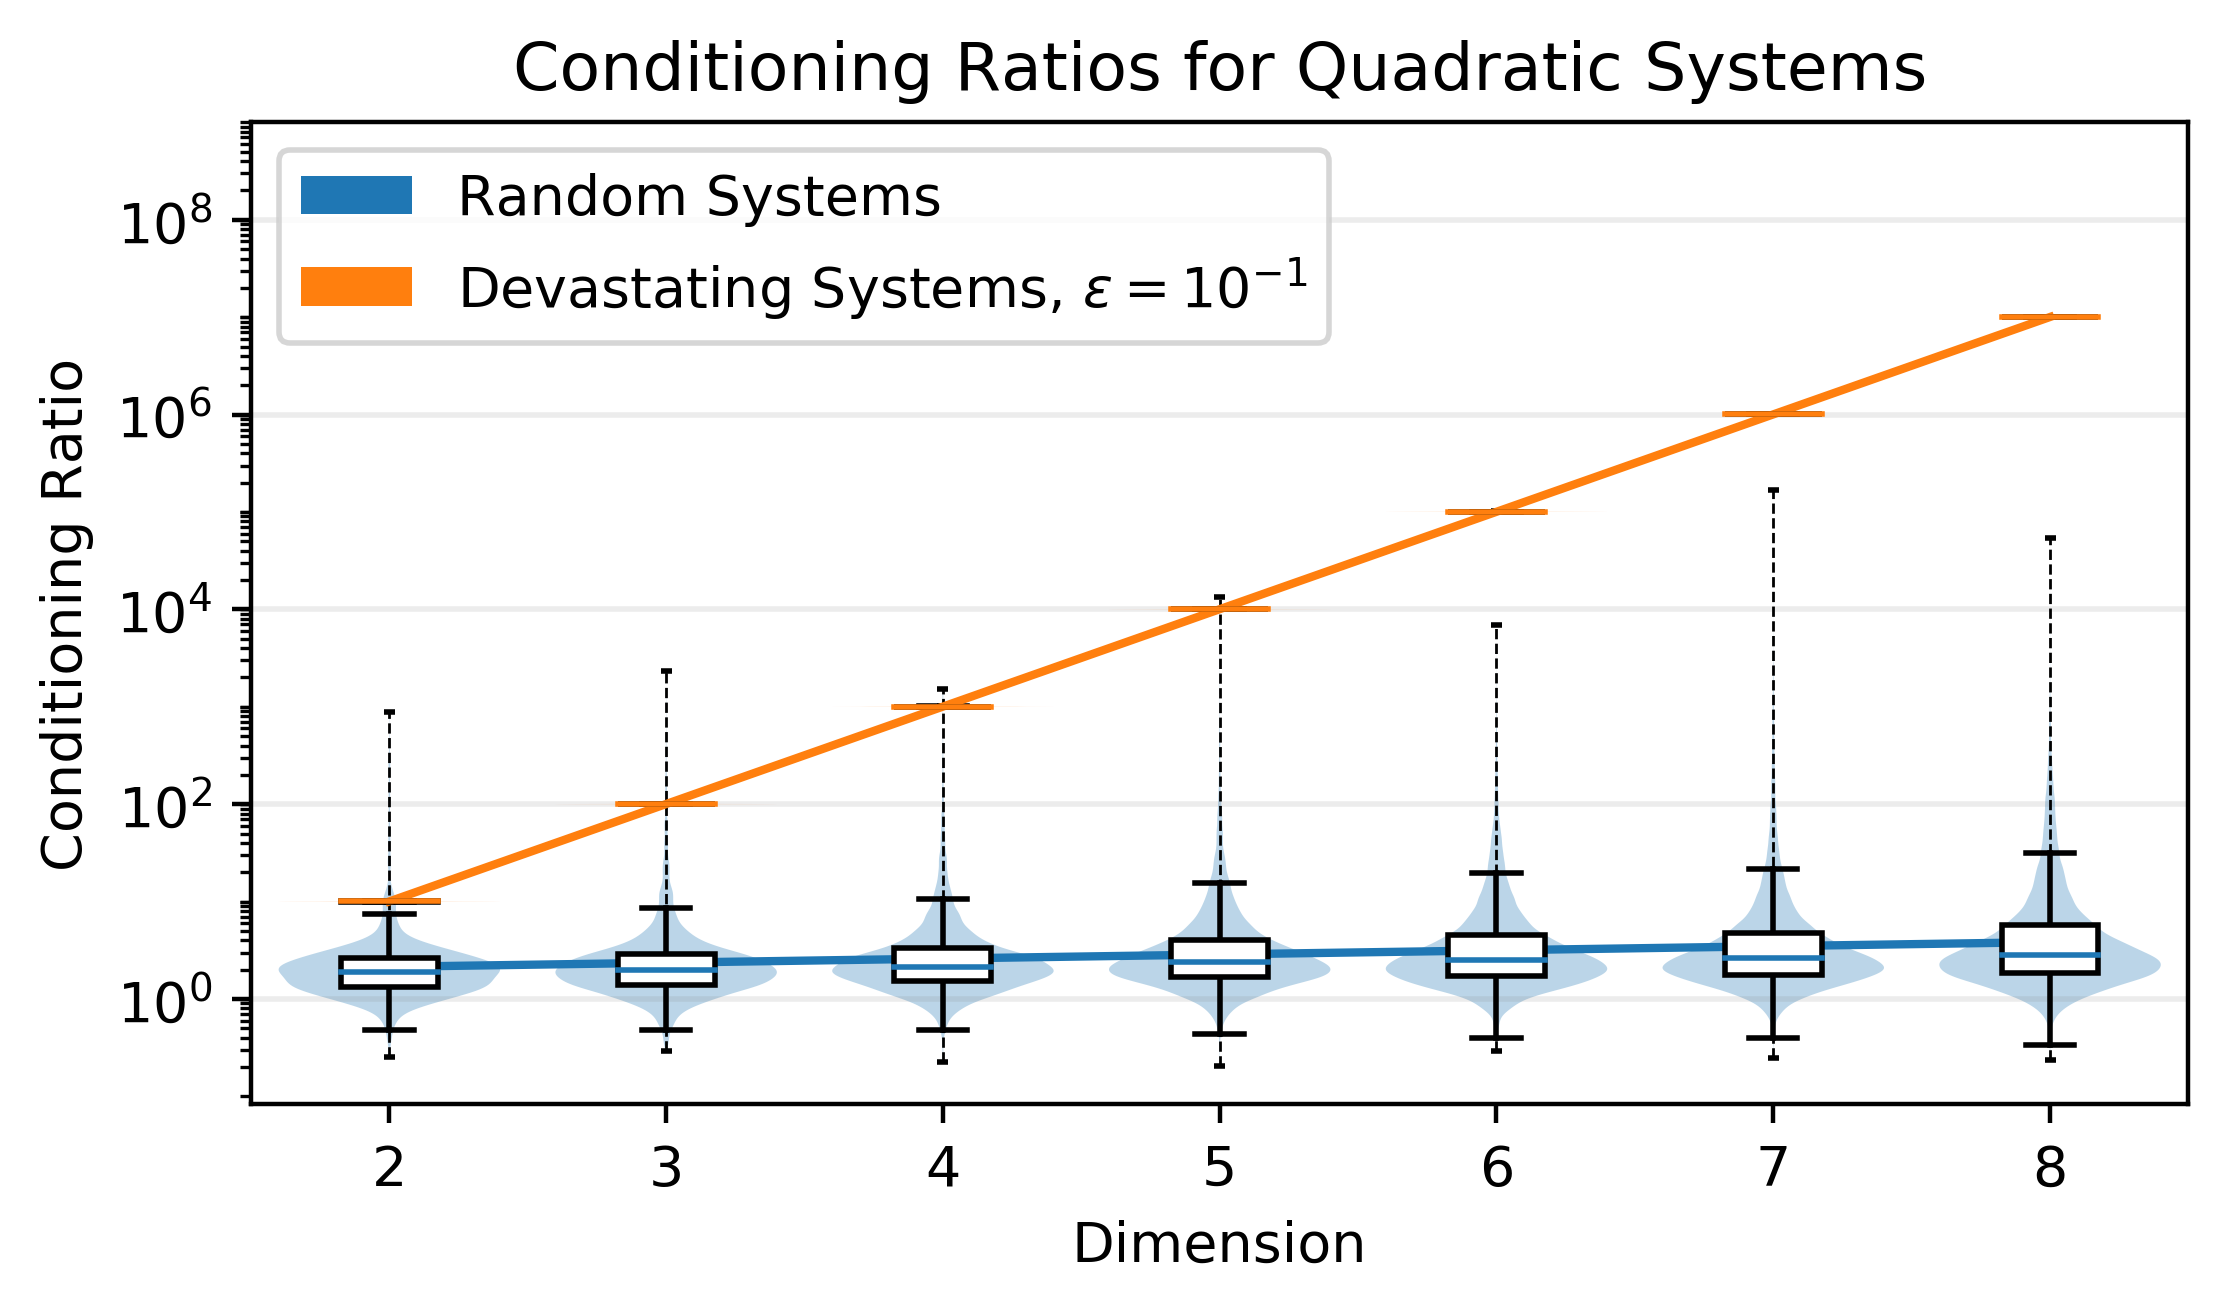

In [81]:
plot([rand_polished,dev_polished],
     ['Random Systems',r'Devastating Systems, $\epsilon=10^{-1}$'],
     figsize=(6.25,3.25), filename='rand_dev2', title='Conditioning Ratios for Quadratic Systems')

#### FIGURES IN THE PAPER:
* figsize is the desired actual size in the final printed article, measured in inches -- controlable
* dpi at least 300 -- defaults to 400
* file type  pdf -- does that in saving
* bbox_inches = ‘tight’ -- does that in saving

In [82]:
def get_log_medians(data):
    return [np.median(np.log10(data[d])) for d in data.keys()]
def get_perc_neg(data):
    return [np.mean(np.log10(data[d])<0)*100 for d in data.keys()]

In [83]:
print('log medians')
print('Rand:',np.round(get_log_medians(rand_polished),4))
print('Dev :',np.round(get_log_medians(dev_polished),4))
print('Rand % Negative:',np.round(get_perc_neg(rand_polished),4))

log medians
Rand: [0.2801 0.2958 0.3331 0.3817 0.4027 0.4176 0.452 ]
Dev : [1.0028 2.0018 3.0015 4.0021 5.0019 6.0012 7.0034]
Rand % Negative: [9.5833 9.096  6.9107 5.0902 4.2508 3.7985 3.8086]


# Generate Random Systems with known roots

Goal: Find $n$ hyperellipses that have common roots at  chosen points $\mathbf {r_1,\ldots,r_n}$. 

Let's just take this one hyperellipse at a time.

Pick a chosen center $\mathbf c$ of the hyperellipse.

Then the equation for the hyperellipse is

$$f(\mathbf x) = \sum_{j=1}^n \frac{(x_j - c_j)^2}{a_{j}^2} - 1$$

and it has a root at $\mathbf r_i$ iff

$$\sum_{j=1}^n \frac{(r_{ij} - c_j)^2}{a_{j}^2} = 1$$

Good news! This is just a linear system in $1/a_i^2$!

$$\begin{bmatrix}
(r_{11} - c_1)^2       &   (r_{11} - c_2)^2       & \dots     &   (r_{1n} - c_n)^2       \\
(r_{21} - c_1)^2       &   (r_{21} - c_2)^2       & \dots     &   (r_{2n} - c_n)^2       \\
\vdots  &  \vdots   &   \vdots  &   \vdots  \\   
(r_{n1} - c_1)^2       &   (r_{n1} - c_2)^2       & \dots     &   (r_{nn} - c_n)^2       \\
\end{bmatrix}
\begin{bmatrix}
1/a_1^2    \\
1/a_2^2     \\
\vdots  \\
1/a_n^2     \\
\end{bmatrix}=
\mathbb 1$$

If you get a solution that has some negative outputs for $1/a_i^2$, then you've got some sort of cross between a hyperellipse and a hyperhyperbola.

For convenience, we're just going to use $1/a_i^2$ for our coefficients and not actually convert to $a_i$. In the code, I've denoted the $\mathbf a$ vector as `scalar`.

If we repeat this process $n$ times, we end up with $n$ hyper-conics that have common roots at $\mathbf {r_1,\ldots,r_n}$.

In [84]:
np.random.seed(0)
dim = 2
roots = np.random.randn(dim,dim)
centers = np.random.randn(dim,dim)
print('Chosen Roots:',*roots)
print('Chosen Centers:',*centers)

Chosen Roots: [1.76405235 0.40015721] [0.97873798 2.2408932 ]
Chosen Centers: [ 1.86755799 -0.97727788] [ 0.95008842 -0.15135721]


In [85]:
scalars = [get_scalar(c,roots) for c in centers]
print('Scalars:',*scalars)

Scalars: [-6.09487717  0.56147239] [1.42922176 0.17453276]


In [86]:
polys = [get_MultiPower(c,roots) for c in centers]
print('Coefficients of Polynomials:',*[p.coeff for p in polys],sep='\n')

Coefficients of Polynomials:
[[-21.72130051   1.0974291    0.56147239]
 [ 22.76507313   0.           0.        ]
 [ -6.09487717   0.           0.        ]]
[[ 0.29411112  0.05283358  0.17453276]
 [-2.71577408  0.          0.        ]
 [ 1.42922176  0.          0.        ]]


In [87]:
yr.solve(polys,[-3]*2,[3]*2)

Percent Finished: 100%                                                  
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [ 0. 50.  0. 50.  0.]


array([[0.97873798, 2.2408932 ],
       [1.76405235, 0.40015721]])

In [88]:
yr.polysolve(polys)

array([[ 1.57470473-0.40344222j, -2.33352442-0.94564756j],
       [ 1.57470473+0.40344222j, -2.33352442+0.94564756j],
       [ 0.97873798+0.        j,  2.2408932 +0.        j],
       [ 1.76405235+0.        j,  0.40015721+0.        j]])

# Generate Random Systems that Almost have Multiple Roots

### roots of multiplicity dim

In [89]:
mult1 = get_data(delta=.1,gen_func=gen_almost_multiple_roots)

2
3
4


In [90]:
mult01 = get_data(delta=.01,gen_func=gen_almost_multiple_roots)

2
3
4


In [91]:
mult001 = get_data(delta=.001,gen_func=gen_almost_multiple_roots)

2
3
4


$\epsilon=10^{-2}$, $\delta=0$
Slope: 2.000002947524729 
Intercept: -1.9999878417351438

$\epsilon=10^{-2}$, $\delta=10^{-5}$
Slope: 1.3144169181131522 
Intercept: -1.4232514579487403

$\epsilon=10^{-2}$, $\delta=10^{-4}$
Slope: 0.9165401503834628 
Intercept: -1.1305347694926966

$\epsilon=10^{-2}$, $\delta=10^{-3}$
Slope: 0.37446224959916774 
Intercept: -0.4776076970334088



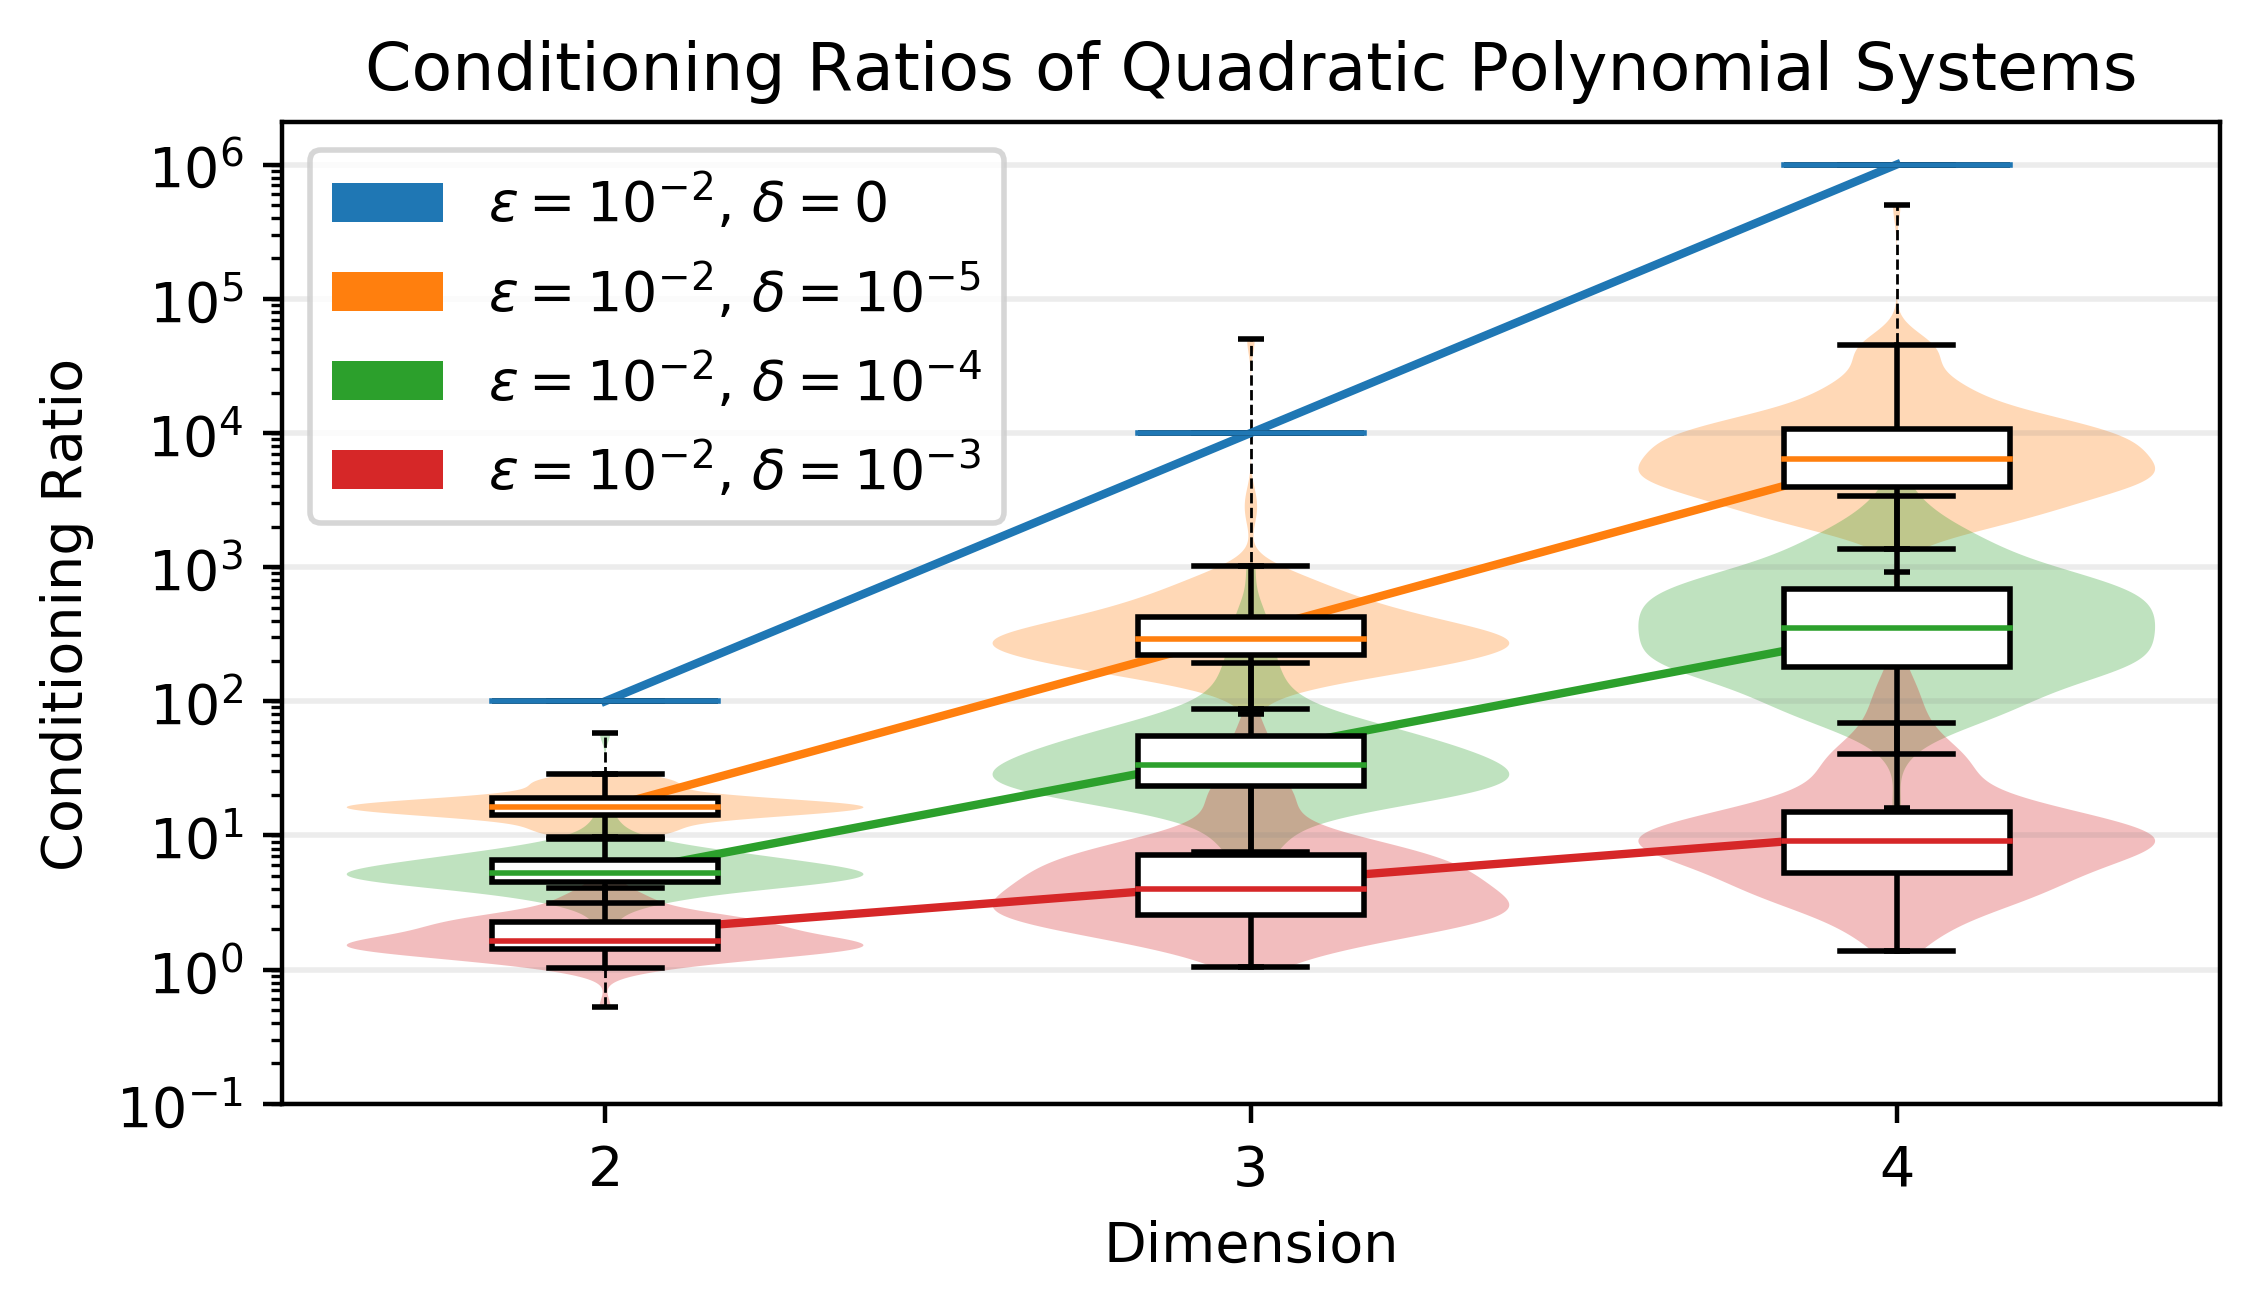

In [96]:
plot([gf_dev_2,
      gf_dev_2_delta3,
      gf_dev_2_delta_2,
      gf_dev_2_delta_1],
     [r'$\epsilon=10^{-2}$, $\delta=0$',
      r'$\epsilon=10^{-2}$, $\delta=10^{-5}$',
      r'$\epsilon=10^{-2}$, $\delta=10^{-4}$',
      r'$\epsilon=10^{-2}$, $\delta=10^{-3}$'],
     figsize=(6.25,3.25), filename='growth_factor_perturb_small2', title='Conditioning Ratios of Quadratic Polynomial Systems',
     min_ylim=-1,
     max_ylim=6)

$\alpha=10^{-5}$
Slope: 2.4748137424053223 
Intercept: -4.8510997797810536

$\alpha=10^{-4}$
Slope: 1.640766319157882 
Intercept: -3.2487423254245473

$\alpha=10^{-3}$
Slope: 0.6996369434415279 
Intercept: -1.388299121486556



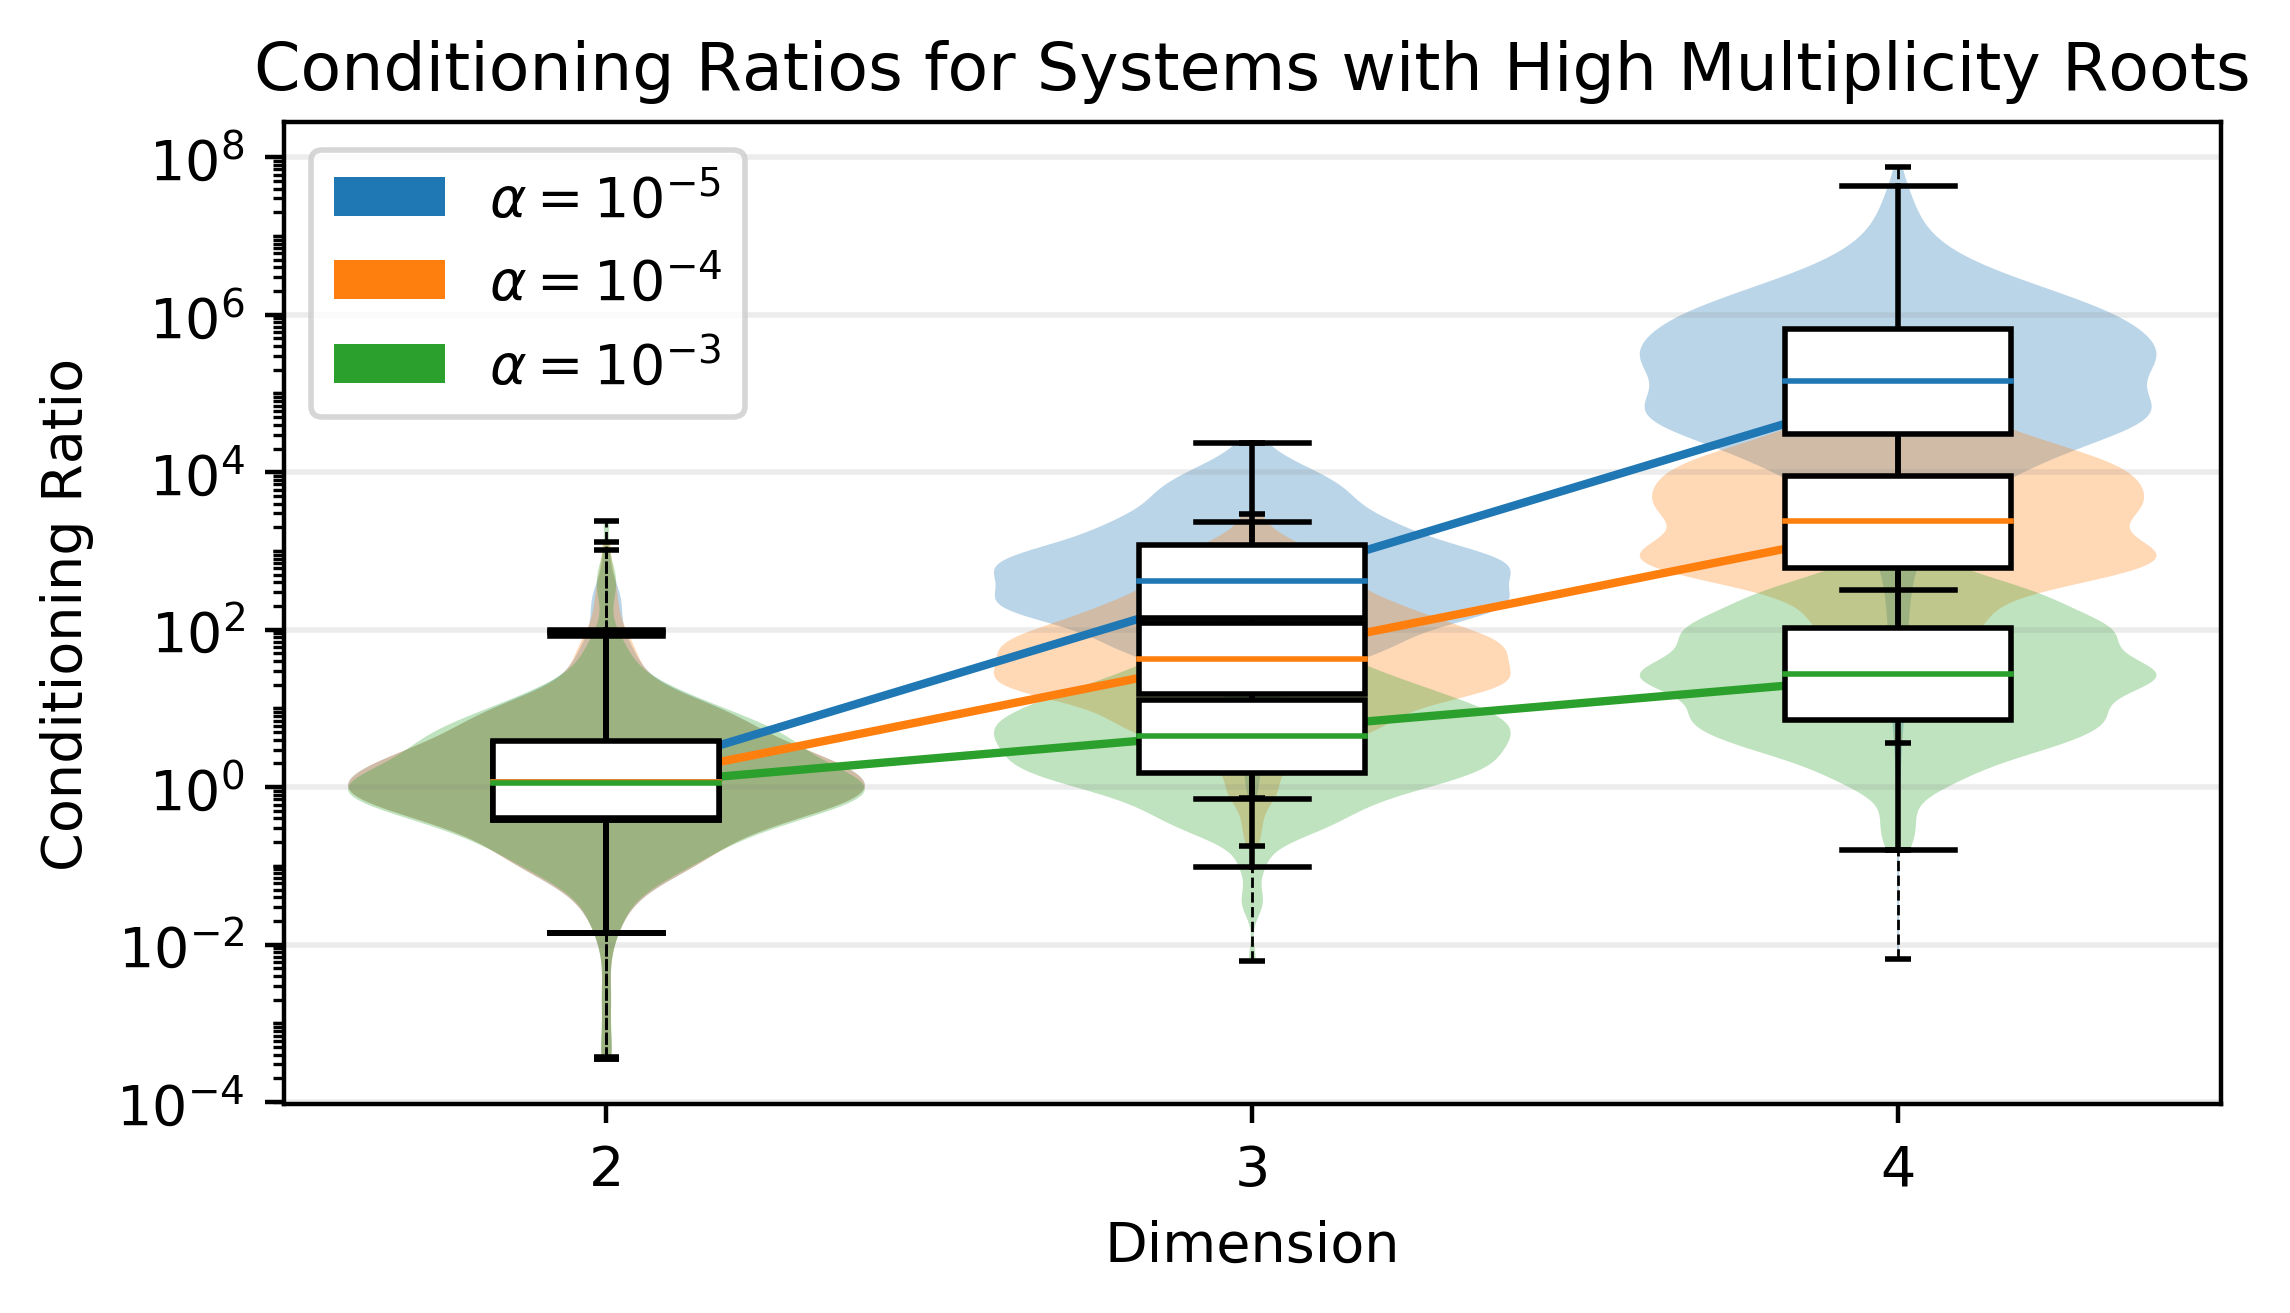

In [57]:
plot([mult001,
      mult01,
      mult1],
     [r'$\alpha=10^{-5}$',
      r'$\alpha=10^{-4}$',
      r'$\alpha=10^{-3}$'],
     figsize=(6.25,3.25), 
     filename='high_multiplicity2', 
     title='Conditioning Ratios for Systems with High Multiplicity Roots',
     min_ylim=-4,
     max_ylim=8)

$\delta=10^{-3}$
Slope: 2.000002947524729 
Intercept: -1.9999878417351438

$\delta=10^{-4}$
Slope: 1.3144169181131522 
Intercept: -1.4232514579487403

$\delta=10^{-5}$
Slope: 0.9165401503834628 
Intercept: -1.1305347694926966

temp
Slope: 0.37446224959916774 
Intercept: -0.4776076970334088

$\delta=10^{-3}$
Slope: 2.000002947524729 
Intercept: -1.9999878417351438

$\delta=10^{-4}$
Slope: 0.6996369434415279 
Intercept: -1.388299121486556

$\delta=10^{-5}$
Slope: 1.640766319157882 
Intercept: -3.2487423254245473

temp
Slope: 2.4748137424053223 
Intercept: -4.8510997797810536



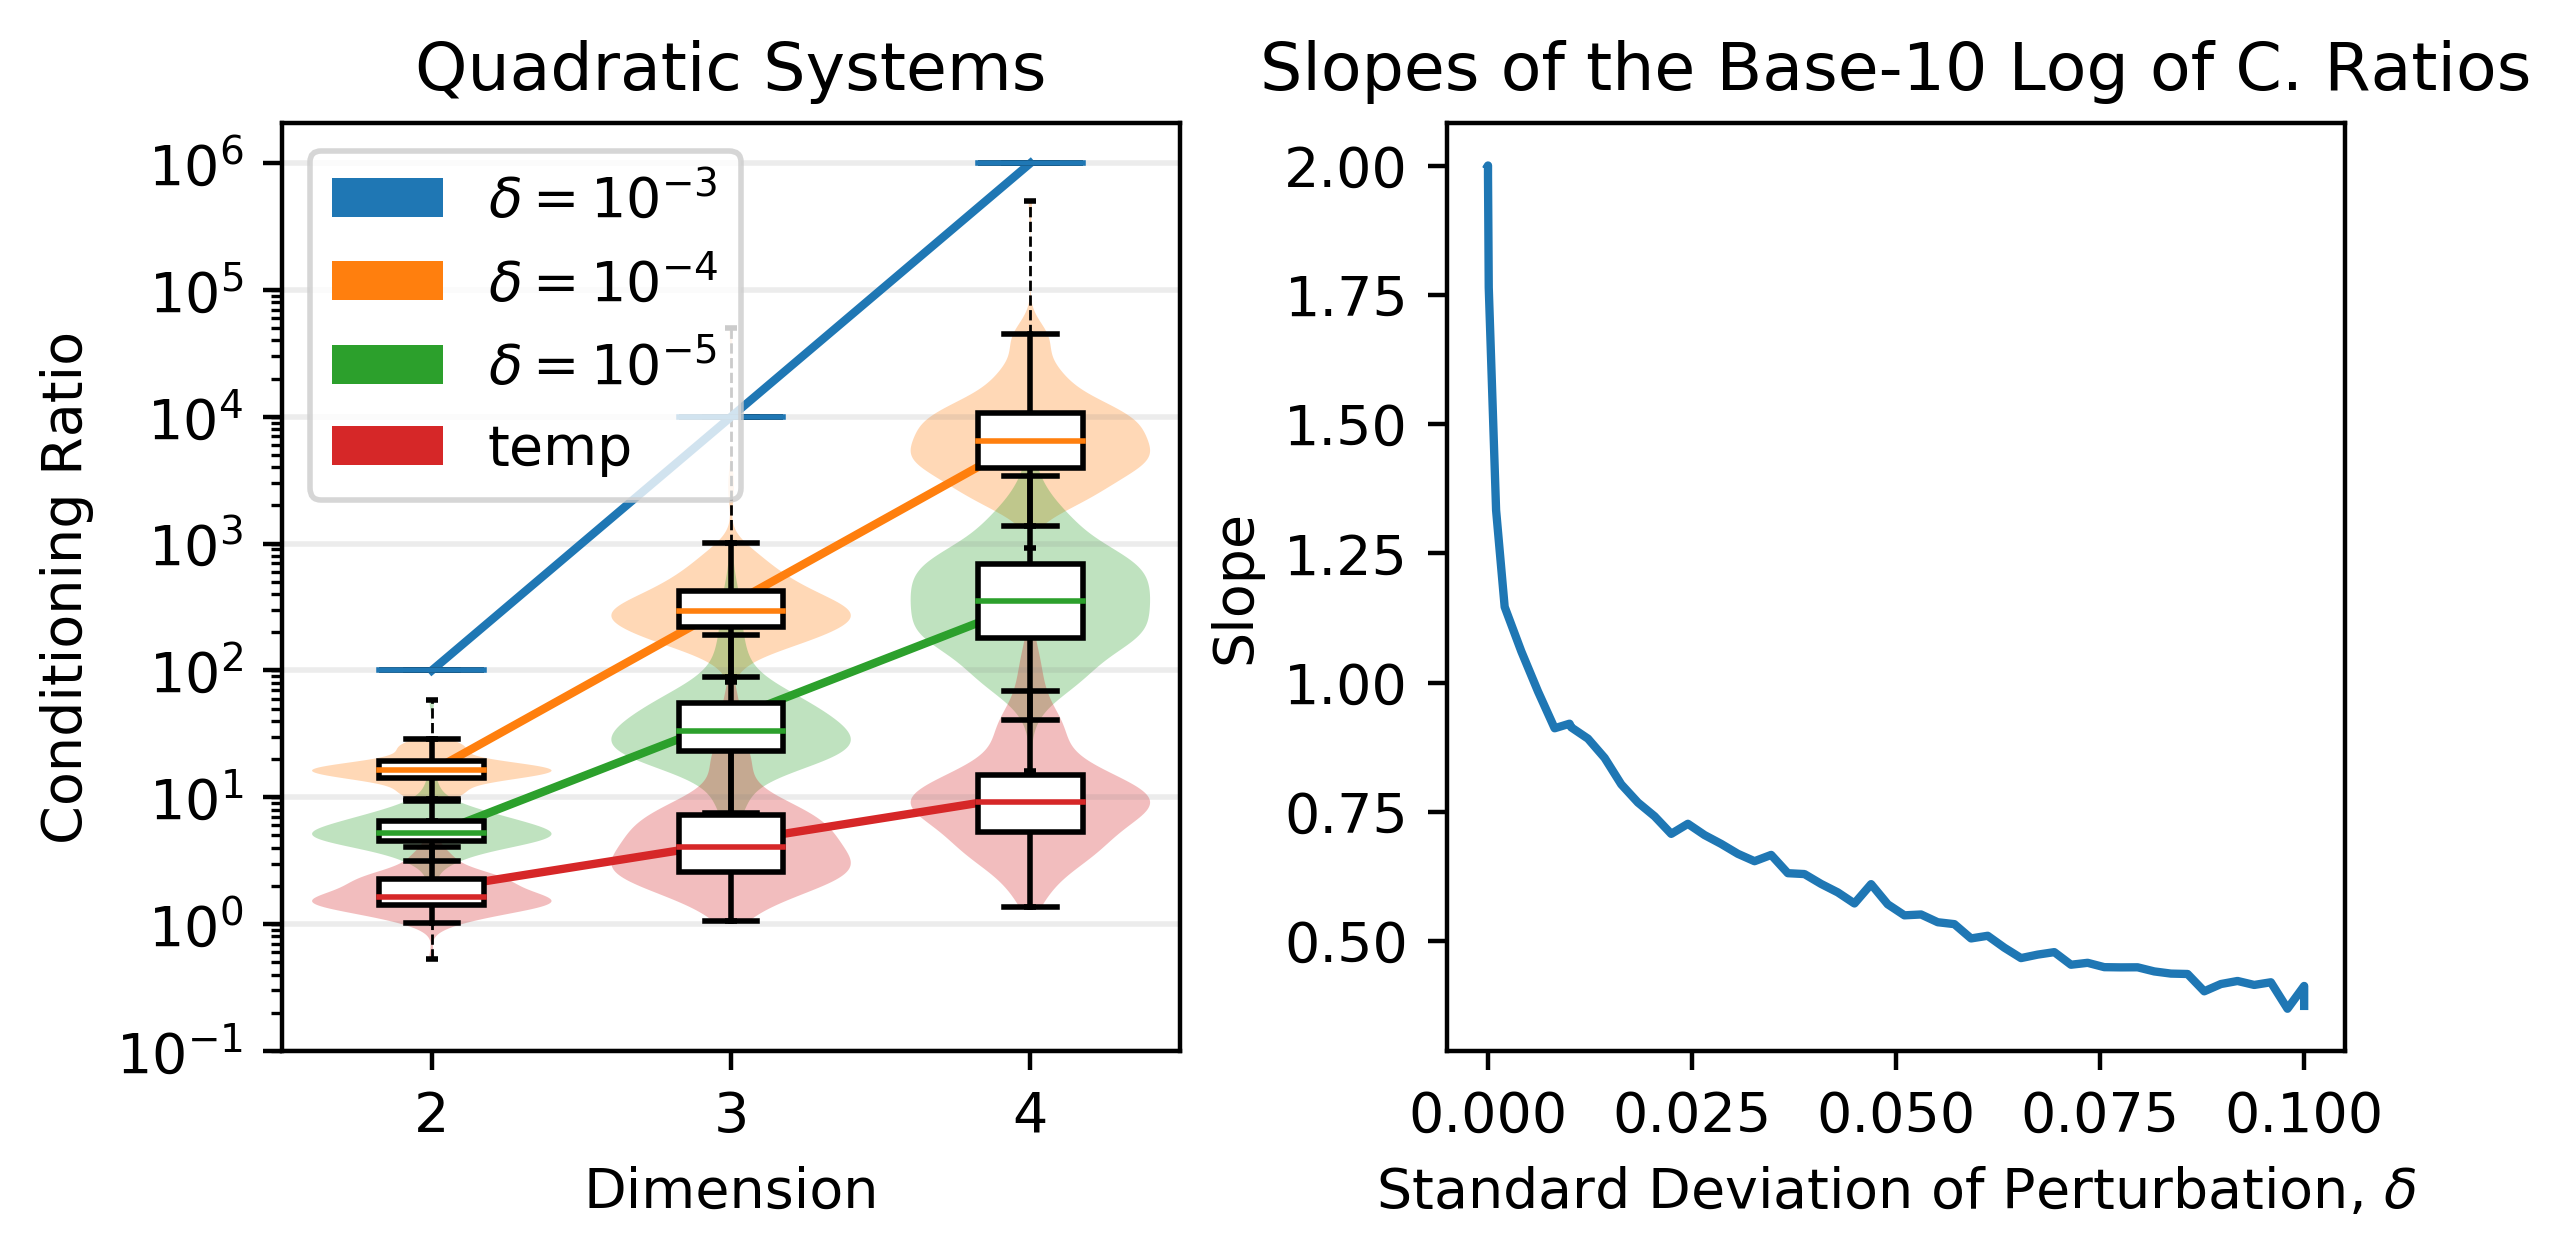

In [111]:
plot([[gf_dev_2,
      gf_dev_2_delta_3,
      gf_dev_2_delta_2,
      gf_dev_2_delta_1],
      [gf_dev_2,
      mult1,
      mult01,
      mult001]],
     [[r'$\delta=0$',
      r'$\delta=10^{-3}$',
      r'$\delta=10^{-4}$',
      r'$\delta=10^{-5}$',],
      [r'$\delta=0$',
      r'$\delta=10^{-3}$',
      r'$\delta=10^{-4}$',
      r'$\delta=10^{-5}$',]
      ],
     figsize=(6.25,3.25), filename='growth_factor_perturb_small4', 
     #title='Conditioning Ratios of Polynomial Systems',
     title=['Conditioning Ratios','temp',''],
     subplots=[1,2], 2nd_plot=[deltas[srt],slopes[srt]])

### double, not multiple roots

In [ ]:
doub1 = get_data(delta=.1,gen_func=gen_almost_double_roots)

In [ ]:
doub01 = get_data(delta=.01,gen_func=gen_almost_double_roots)

In [ ]:
doub001 = get_data(delta=.001,gen_func=gen_almost_double_roots)

In [ ]:
plot([doub001],
      [r'Almost Double Roots, $\delta=.001$'],
     figsize=(15,10), filename='CRoQPS6')

# Generate Random Hyperellipse Systems

In [ ]:
rand1 = get_data(delta=.1,gen_func=gen_rand_hyperellipses)

In [ ]:
plot([rand1],
     [r'Random Hyperellipse/Hyperbola Systems'],
     figsize=(15,10), filename='CRoQPS7')